# Artificial Neural Network

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import time
import random

In [ ]:
tf.__version__

'2.18.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [ ]:
dataset = pd.read_csv('WF_data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(y_train)

[0.29455124 0.38300961 0.16775791 ... 0.27727062 0.13834678 0.31615834]


##Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1,1))


## Part 2 - Building the ANN

In [ ]:
##Set fixed random seed

In [ ]:
seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

### Initializing the ANN

In [ ]:
ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=9, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=6, activation='relu',),
    tf.keras.layers.Dense(units=3, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

#ann = tf.keras.models.Sequential()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Adding the input layer and the first hidden layer

### Adding the 2nd, 3rd, and 4th hidden layers

In [ ]:
#ann.add(tf.keras.layers.Dense(units=7, activation='relu'))
#ann.add(tf.keras.layers.Dense(units=4, activation='relu'))


### Adding the output layer

In [ ]:
#ann.add(tf.keras.layers.Dense(units=1))

## Part 3 - Training the ANN

### Compiling the ANN

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)  # Default is 0.001, try 0.0005
ann.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

### Training the ANN model on the Training set

In [ ]:
start_train = time.time()
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
ann.fit(X_train, y_train, batch_size = 16, shuffle=True, epochs =100, validation_split=0.2, callbacks=[early_stopping])
end_train = time.time()

Epoch 1/100
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.3727 - mae: 0.4295 - val_loss: 0.1366 - val_mae: 0.2790
Epoch 2/100
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1729 - mae: 0.2902 - val_loss: 0.1114 - val_mae: 0.2571
Epoch 3/100
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.1553 - mae: 0.2727 - val_loss: 0.1021 - val_mae: 0.2439
Epoch 4/100
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.1464 - mae: 0.2610 - val_loss: 0.1125 - val_mae: 0.2486
Epoch 5/100
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1440 - mae: 0.2571 - val_loss: 0.0963 - val_mae: 0.2276
Epoch 6/100
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.1362 - mae: 0.2493 - val_loss: 0.0886 - val_mae: 0.2395
Epoch 7/100
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.1254 - mae: 0.2418 - val_loss: 0.0773 - val_mae: 0.2103
Epoch 8/100
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1247 - mae: 0.2406 - val_loss: 0.0994 - val_mae: 0.2610
Epoch 9/100
1986/1986 ━━━━━━━━

### Predicting the results of the Test set

In [ ]:
start_pred = time.time()
y_pred = sc_y.inverse_transform(ann.predict(sc_X.transform(X_test)))
end_pred = time.time()

np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

311/311 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[0.52 0.36]
 [0.38 0.41]
 [0.25 0.2 ]
 ...
 [0.81 0.78]
 [0.38 0.34]
 [0.2  0.12]]


## Plot

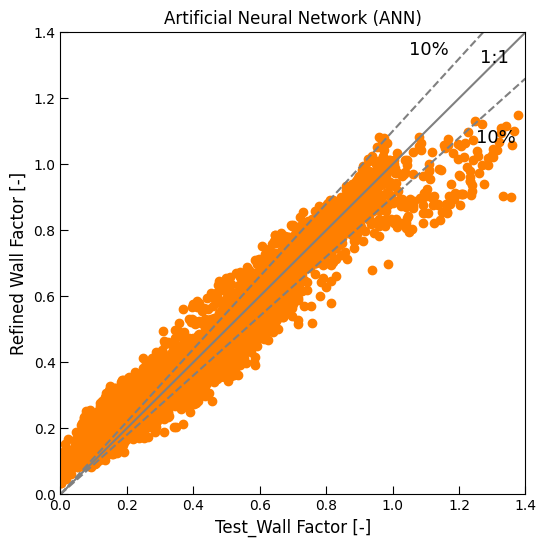

In [ ]:
import matplotlib.pyplot as plt


# Set the font to Helvetica (widely available)
plt.rcParams['font.family'] = 'Helvetica'

# Stronger Orange for 20% Deviation Lines
strong_orange = '#FF7F00'  # A brighter, stronger orange

plt.figure(figsize=(6, 6))
plt.plot([0., 1.4], [0., 1.4], 'grey')
plt.plot([0, 1.4], [0*1.1, 1.4*1.1], 'grey', linestyle='dashed')
plt.plot([0, 1.4], [0*0.9, 1.4*0.9], 'grey', linestyle='dashed')

# Annotating "20%" on the deviation lines
plt.text(1.17, 1.2 * 1.1, "10%", color='k', fontsize=13, ha='right', va='bottom')
plt.text(1.37, 1.23 * 0.9, "10%", color='k', fontsize=13, ha='right', va='top')
plt.text(1.35, 1.35, "1:1", color='k', fontsize=13, ha='right', va='top')

# **Set fixed axis limits**
plt.xlim(0, 1.4)  # Fix x-axis range from 0 to 1.5
plt.ylim(0, 1.4)  # Fix y-axis range from 0 to 1.5

# Create scatter plot
plt.scatter(y_test, y_pred, color=strong_orange, marker='o')

# Labels and title
plt.xlabel("Test_Wall Factor [-]", fontsize=12,)
plt.ylabel("Refined Wall Factor [-]", fontsize=12)
plt.title("Artificial Neural Network (ANN)", fontsize=12)

plt.tick_params(axis='both', direction='in', length=6)
# Show plot

plt.show()

##ANN Metrics

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

R-squared (R²): 0.9400545257638224
Root Mean Squared Error (RMSE): 0.06128308451875968
Mean Squared Error: 0.0037556164481334425
Mean Absolute Error (MAE): 0.04838597974876438


In [ ]:
import time

# Measure training time
training_time = end_train - start_train

# Measure prediction time
prediction_time = end_pred - start_pred

print(f"Training Time: {training_time:.5f} seconds")
print(f"Prediction Time: {prediction_time:.5f} seconds")

Training Time: 272.28011 seconds
Prediction Time: 0.69996 seconds


## Vancouver Building WF

##Import Exp_data

In [ ]:
dataset = pd.read_csv('VB_EXP.csv')
X_VB = dataset.iloc[:, :-1].values
y_VB = dataset.iloc[:, -1].values

##WF_VB prediction

In [ ]:
start_pred_VB = time.time()
y_pred_VB = sc_y.inverse_transform(ann.predict(sc_X.transform(X_VB)))
end_pred_VB = time.time()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


##Plot _ VB

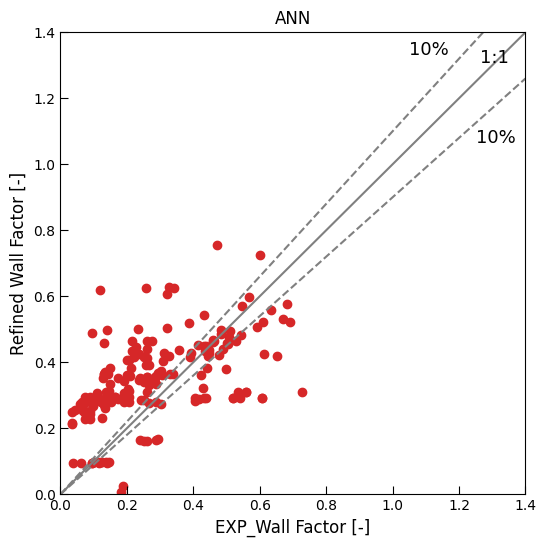

In [ ]:
import matplotlib.pyplot as plt

# Stronger Orange for 20% Deviation Lines
strong_orange = '#D62728'  # A brighter, stronger orange

plt.figure(figsize=(6, 6))
plt.plot([0., 1.4], [0., 1.4], 'grey')
plt.plot([0, 1.4], [0*1.1, 1.4*1.1], 'grey', linestyle='dashed')
plt.plot([0, 1.4], [0*0.9, 1.4*0.9], 'grey', linestyle='dashed')

# Annotating "20%" on the deviation lines
plt.text(1.17, 1.2 * 1.1, "10%", color='k', fontsize=13, ha='right', va='bottom')
plt.text(1.37, 1.23 * 0.9, "10%", color='k', fontsize=13, ha='right', va='top')
plt.text(1.35, 1.35, "1:1", color='k', fontsize=13, ha='right', va='top')

# **Set fixed axis limits**
plt.xlim(0, 1.4)  # Fix x-axis range from 0 to 1.5
plt.ylim(0, 1.4)  # Fix y-axis range from 0 to 1.5

# Create scatter plot
plt.scatter(y_VB, y_pred_VB, color=strong_orange, marker='o')

# Labels and title
plt.xlabel("EXP_Wall Factor [-]", fontsize=12,)
plt.ylabel("Refined Wall Factor [-]", fontsize=12)
plt.title("ANN", fontsize=12)

plt.tick_params(axis='both', direction='in', length=6)
# Show plot

plt.show()

##ML models metrics


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


r2 = r2_score(y_VB, y_pred_VB)
print(f"R-squared (R²): {r2}")

rmse = np.sqrt(mean_squared_error(y_VB, y_pred_VB))
print(f"Root Mean Squared Error (RMSE): {rmse}")

mse = mean_squared_error(y_VB, y_pred_VB)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(y_VB, y_pred_VB)
print(f"Mean Absolute Error (MAE): {mae}")

average_pred_VB = sum(y_pred_VB) / len(y_pred_VB)
print(f"Average_pred_VB: {average_pred_VB}")

average_VB = sum(y_VB) / len(y_VB)
print(f"Average_VB: {average_VB}")

Ave_Error = float(((average_pred_VB - average_VB) * 100) / average_VB)
print(f"Ave_Error: {Ave_Error:.2f}%")


# Calculate individual percentage errors
individual_errors = (np.abs(y_pred_VB - y_VB) / y_VB) * 100
# Calculate the average error
average_error = np.mean(individual_errors)  # Use np.mean() to handle NumPy arrays
# Print the average error
print(f"Average Error: {average_error:.2f}%")

#######################
print("y_VB (first 5):", y_VB[:5])
print("y_pred_VB (first 5):", y_pred_VB[:5])

# Flatten WF_EXP to 1D
y_pred_VB = y_pred_VB.flatten()

# Calculate individual errors
individual_errors = (np.abs(y_pred_VB - y_VB) / y_VB) * 100
average_error = np.mean(individual_errors)

print("y_VB (first 5):", y_VB[:5])
print("y_pred_VB (first 5):", y_pred_VB[:5])
print("Individual Errors (first 5, %):", individual_errors[:5])
print(f"Average Error: {average_error:.2f}%")

R-squared (R²): 0.12658109282311403
Root Mean Squared Error (RMSE): 0.16026518890953462
Mean Squared Error: 0.025684930776208814
Mean Absolute Error (MAE): 0.13356342820929645
Average_pred_VB: 0.3341518052295796
Average_VB: 0.2686844826598983
Ave_Error: 24.37%
Average Error: 90.80%
y_VB (first 5): [0.6  0.32 0.15 0.43 0.32]
y_pred_VB (first 5): [0.72 0.5  0.38 0.32 0.61]
y_VB (first 5): [0.6  0.32 0.15 0.43 0.32]
y_pred_VB (first 5): [0.72 0.5  0.38 0.32 0.61]
Individual Errors (first 5, %): [ 20.7   56.4  156.04  25.18  88.73]
Average Error: 90.80%


In [ ]:
import time


# Measure VB prediction time
prediction_time_VB = end_pred_VB - start_pred_VB

print(f"Prediction Time_VB: {prediction_time_VB:.5f} seconds")

Prediction Time_VB: 0.10954 seconds


## Vancouver Building WF _______ Overhang

##Import Exp_data

In [ ]:
dataset = pd.read_csv('VB_EXP_Overhang.csv')
X_VBO = dataset.iloc[:, :-1].values
y_VBO = dataset.iloc[:, -1].values

##WF_VB prediction

In [ ]:
start_pred_VBO = time.time()
y_pred_VBO = sc_y.inverse_transform(ann.predict(sc_X.transform(X_VBO)))
end_pred_VBO = time.time()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


##Plot _ VB

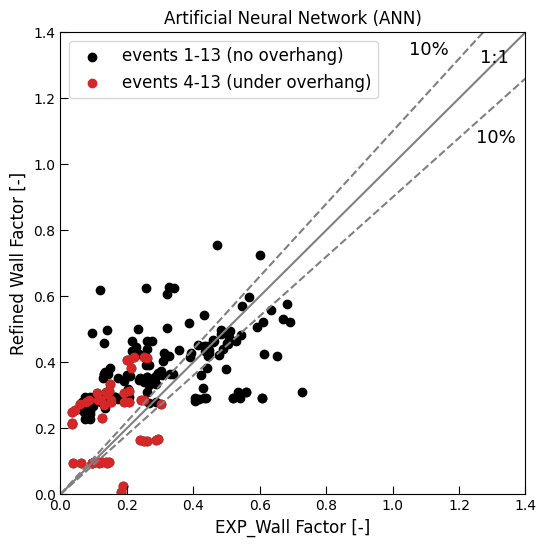

In [ ]:
import matplotlib.pyplot as plt

# Stronger Orange for 20% Deviation Lines
strong_orange = '#D62728'  # A brighter, stronger orange

plt.figure(figsize=(6, 6))
plt.plot([0., 1.4], [0., 1.4], 'grey')
plt.plot([0, 1.4], [0*1.1, 1.4*1.1], 'grey', linestyle='dashed')
plt.plot([0, 1.4], [0*0.9, 1.4*0.9], 'grey', linestyle='dashed')

# Annotating "20%" on the deviation lines
plt.text(1.17, 1.2 * 1.1, "10%", color='k', fontsize=13, ha='right', va='bottom')
plt.text(1.37, 1.23 * 0.9, "10%", color='k', fontsize=13, ha='right', va='top')
plt.text(1.35, 1.35, "1:1", color='k', fontsize=13, ha='right', va='top')

# **Set fixed axis limits**
plt.xlim(0, 1.4)  # Fix x-axis range from 0 to 1.5
plt.ylim(0, 1.4)  # Fix y-axis range from 0 to 1.5

# Create scatter plot
plt.scatter(y_VB, y_pred_VB, color='k', marker='o', label='events 1-13 (no overhang)')
# Create scatter plot
plt.scatter(y_VBO, y_pred_VBO, color=strong_orange, marker='o', label='events 4-13 (under overhang)')

# Labels and title
plt.xlabel("EXP_Wall Factor [-]", fontsize=12,)
plt.ylabel("Refined Wall Factor [-]", fontsize=12)
plt.title("Artificial Neural Network (ANN)", fontsize=12)

plt.tick_params(axis='both', direction='in', length=6)
# Show plot

# Add legend
plt.legend(loc='upper left', fontsize=12)

plt.show()

##ML models metrics


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y_VBO, y_pred_VBO)
print(f"R-squared (R²): {r2}")

rmse = np.sqrt(mean_squared_error(y_VBO, y_pred_VBO))
print(f"Root Mean Squared Error (RMSE): {rmse}")

mse = mean_squared_error(y_VBO, y_pred_VBO)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(y_VBO, y_pred_VBO)
print(f"Mean Absolute Error (MAE): {mae}")

average_pred_VBO = sum(y_pred_VBO) / len(y_pred_VBO)
print(f"Average_pred_VB: {average_pred_VBO}")

average_VBO = sum(y_VBO) / len(y_VBO)
print(f"Average_VB: {average_VBO}")

Ave_Error = float(((average_pred_VBO - average_VBO) * 100) / average_VBO)
print(f"Ave_Error: {Ave_Error:.2f}%")


# Calculate individual percentage errors
individual_errors = (np.abs(y_pred_VBO - y_VBO) / y_VBO) * 100
# Calculate the average error
average_error = np.mean(individual_errors)  # Use np.mean() to handle NumPy arrays
# Print the average error
print(f"Average Error: {average_error:.2f}%")

<ipython-input-25-fec344088dc7>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ave_Error = float(((average_pred_VBO - average_VBO) * 100) / average_VBO)


R-squared (R²): -2.0264463827617614
Root Mean Squared Error (RMSE): 0.13264761631284466
Mean Squared Error: 0.01759539011347965
Mean Absolute Error (MAE): 0.11557454728729688
Average_pred_VB: [0.2]
Average_VB: 0.1450481109821429
Ave_Error: 37.33%
Average Error: 156.49%


In [ ]:
import time


# Measure VB prediction time
prediction_time_VB = end_pred_VB - start_pred_VB

print(f"Prediction Time_VB: {prediction_time_VB:.5f} seconds")

Prediction Time_VB: 0.10954 seconds
